For any two non-zero masses, there is a force between the two that is given as

$\begin{align}
\frac{Gm_1m_2}{r^2}\hat{r}
\end{align}$

Along the line between them.  For two bodies, they must exist in the same plane and so we can only consider the x and y coordinates.  Notably we have 

$\begin{align}
F_x = \frac{Gm_1m_2}{r^2}cos(\theta) ~~~~~F_y = \frac{Gm_1m_2}{r^2}sin(\theta)
\end{align}$

Using the line segment between the two bodies as the triangle hypotnuse we have that $\theta = arctan(\frac{\Delta y}{\Delta x})$, which we can then use along with trig identities to give 

$\begin{align}
sin(\theta) = \frac{\Delta y}{r} ~~~~~ cos(\theta) = \frac{\Delta x}{r}
\end{align}$

Giving us the final component wise equations 

$\begin{align}
F_x = \frac{Gm_1m_2\Delta x}{r^3} ~~~~~F_y = \frac{Gm_1m_2 \Delta y}{r^3}
\end{align}$

The sign of the delta terms are dependent on the body being observed, and differ by a negative sign.

In [8]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [7]:
class orbit:
    """
    Orbit class implements the equations of the N body problem in cartesian 
    coordinates.
     
    Parameters
    ----------
    m1, m2 : float
        length of the planetary body masses
    G : float
        gravitational constant mediates strength of force
    
    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
        
    solve_ode(self, 
                  t_pts,
                  x01, x02, y01, y02, 
                  dx01, dx02, dy01, dy02,
                  abserr=1.0e-14, relerr=1.0e-12):
        Solves the ODE system and returns the coordinates as a function of time
    """
    def __init__(self, m1 = 1, m2 = 1, G = 1):
        self.G =G
        self.m1 = m1
        self.m2 = m2
        
    def dydt(self, t, y):
        """
        y is an input vector of the form 
        y[0] = x_1
        y[1] = y_1
        y[2] = dx_1
        y[3] = dy_1
        y[4] = x_2
        y[5] = y_2
        y[6] = dx_2
        y[7] = dy_2
        
        t is the set of input points
        """
        r = np.sqrt((y[0] - y[4]) ** 2 + (y[1] - y[5]) **2)
        
        return [y[2], y[3], 
                self.G*self.m2*(y[4]-y[0])/r**3, self.G*self.m2*(y[5]-y[1])/r**3   ,
                y[6], y[7],
                self.G*self.m1*(y[0]-y[4])/r**3, self.G*self.m1*(y[1]-y[5])/r**3]
    
    def solve_ode(self, 
                  t_pts,
                  x01, x02, y01, y02, 
                  dx01, dx02, dy01, dy02,
                  abserr=1.0e-14, relerr=1.0e-12):
        
        #set initial conditions
        y = [x01, y01, dx01, dy01, x02, y02, dx02, dy02] 

        solution = solve_ivp(self.dydt, 
                             (t_pts[0], t_pts[-1]), 
                             y, 
                             t_eval=t_pts, 
                             dense_output = True,
                             atol=abserr,
                             rtol=relerr)
        
        return solution

## Test Orbits

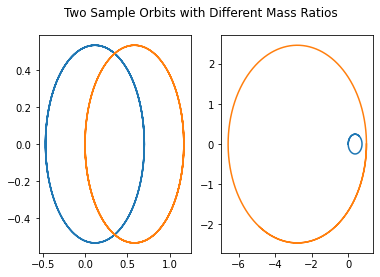

In [50]:
#instantiate sample orbit of similar masses

#orbit with mass ratio 1
o1 = orbit(1, 1, 1)
tpts = np.linspace(0, 20, 10000)

x_1 = .7
y_1 = 0
dx_1 = 0
dy_1 = 1

x_2 = 0
y_2 = 0
dx_2 = 0
dy_2 = -1

sol1 = o1.solve_ode(tpts, 
                    x_1, x_2, y_1, y_2, 
                    dx_1, dx_2, dy_1, dy_2)

#instantiate sample orbit of dissimilar masses

x_1 = 0
y_1 = 0
dx_1 = 0
dy_1 = .4

x_2 = 1
y_2 = 0
dx_2 = 0
dy_2 = -4

#orbit with mass ratio 10
o2 = orbit(10, 1, 1)
tpts = np.linspace(0, 20, 10000)

sol2 = o2.solve_ode(tpts, 
                    x_1, x_2, y_1, y_2, 
                    dx_1, dx_2, dy_1, dy_2)

#plot
fig, (ax1, ax2) = plt.subplots(ncols = 2)
fig.suptitle('Two Sample Orbits with Different Mass Ratios')

ax1.plot(sol1.y[0], sol1.y[1])
ax1.plot(sol1.y[4], sol1.y[5])

ax2.plot(sol2.y[0], sol2.y[1])
ax2.plot(sol2.y[4], sol2.y[5])

## Large mass limit


Text(0.5, 1.0, 'Mass ratio 10, reference frame of larger object')

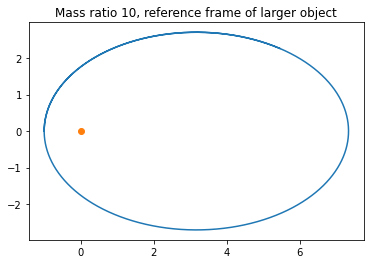

In [60]:
#Demonstrating with the above case
x_1 = 0
y_1 = 0
dx_1 = 0
dy_1 = .4

x_2 = 1
y_2 = 0
dx_2 = 0
dy_2 = -4

o3 = orbit(10, 1, 1)
tpts = np.linspace(0, 20, 10000)

sol = o3.solve_ode(tpts, 
                    x_1, x_2, y_1, y_2, 
                    dx_1, dx_2, dy_1, dy_2)

#plot difference in position with origin(heavy point) marked
fig, ax = plt.subplots()
ax.plot((sol.y[0] - sol.y[4]), (sol.y[1] - sol.y[5]))
ax.plot([0],[0], 'o')
ax.set_title('Mass ratio 10, reference frame of larger object')


The Trend continues as we continue to raise the mass ratio by factors of 10, with distinct ellipses forming, with a focus at the origin.

Text(0.5, 1.0, 'mass ratio 100, reference frame of larger object')

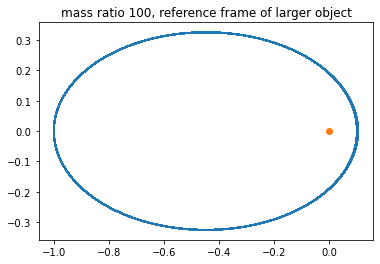

In [61]:
#Demonstrating with the above case
x_1 = 0
y_1 = 0
dx_1 = 0
dy_1 = .4

x_2 = 1
y_2 = 0
dx_2 = 0
dy_2 = -4

o3 = orbit(100, 1, 1)
tpts = np.linspace(0, 20, 10000)

sol = o3.solve_ode(tpts, 
                    x_1, x_2, y_1, y_2, 
                    dx_1, dx_2, dy_1, dy_2)

#plot difference in position with origin(heavy point) marked
fig, ax = plt.subplots()
ax.plot((sol.y[0] - sol.y[4]), (sol.y[1] - sol.y[5]))
ax.plot([0],[0], 'o')
ax.set_title('mass ratio 100, reference frame of larger object')